This notebook is the belief network kitchen.

In [35]:
""" Packages we'll need. """
%load_ext autoreload
%autoreload 2
import numpy as np
import pyreadstat as prs
import os
import sys
sys.path.append('../src')
from clean_data_1 import transform_dataframe_1
from clean_data_2 import transform_dataframe_2
from make_belief_network import make_belief_network
from make_belief_network import make_conditional_belief_network
from get_basic_graph_info import *
from display_network import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
""" Importing the GSS dataset. """

raw_df, meta = prs.read_sas7bdat("../dat/gss7222_r3.sas7bdat")

""" Cleaning the data. """
 
df, metadata = transform_dataframe_1(raw_df)    # df contains all our data, metadata contains some other random shit 

In [37]:
""" Setting the core replicating variables that we're interested in. """


variables = ["PARTYID","POLVIEWS","NATSPAC","NATENVIR","NATHEAL","NATCITY","NATCRIME","NATDRUG","NATEDUC","NATRACE","NATARMS",
"NATAID","NATFARE","NATROAD","NATSOC","NATMASS","NATPARK","NATCHLD","NATSCI","EQWLTH","SPKATH","COLATH","LIBATH","SPKRAC","COLRAC","LIBRAC","SPKCOM","COLCOM","LIBCOM","SPKMIL","COLMIL","LIBMIL","SPKHOMO",
"COLHOMO","LIBHOMO","SPKMSLM","COLMSLM","LIBMSLM","CAPPUN","GUNLAW","COURTS","GRASS","ATTEND","RELITEN","POSTLIFE","PRAYER","AFFRMACT","WRKWAYUP","HELPFUL",
"FAIR","TRUST","CONFINAN","CONBUS","CONCLERG","CONEDUC","CONFED","CONLABOR","CONPRESS","CONMEDIC","CONTV","CONJUDGE","CONSCI","CONLEGIS","CONARMY","GETAHEAD","FEPOL","ABDEFECT","ABNOMORE","ABHLTH","ABPOOR","ABRAPE","ABSINGLE","ABANY","SEXEDUC","DIVLAW","PREMARSX","TEENSEX","XMARSEX","HOMOSEX","PORNLAW",
"SPANKING","LETDIE1","SUICIDE1","SUICIDE2","POLHITOK","POLABUSE","POLMURDR","POLESCAP","POLATTAK","NEWS","TVHOURS","FECHLD","FEPRESCH","FEFAM","RACDIF1","RACDIF2","RACDIF3",
"RACDIF4","HELPPOOR","MARHOMO", "PRESLAST_NONCONFORM", "PRESLAST_DEMREP", "VOTELAST"]

In [38]:
""" Creating unconditioned belief networks. """

""" Belief networks are constructed for a given timeframe and set methodological parameters. """

# Timeframe - specify the start year and duration of the timeframe
start_year = 2016
duration = 4
timeframe = list(range(start_year, start_year+duration))

print(timeframe)

# Parameters
method = "spearman"     # method for calculating correlation
threshold = 0           # threshold for correlation
sample_threshold = 0    # threshold for sample size
regularisation = 0.2    # regularisation parameter for partial correlation

""" Note: for now, we keep the threshold and sample threshold at 0. 
    Regularisation can be set between around 1.5 and 2.5. """

BN, variables_list, correlation_matrix_partial = make_belief_network(df, variables, timeframe, method=method, is_partial=True, threshold=threshold, 
                                                                     sample_threshold=sample_threshold, regularisation=regularisation)

""" Print some basic information about the belief network. """
print_network_info(get_network_info(correlation_matrix_partial, variables_list))


""" Save the graphml, correlation matrix (csv), variables list (csv). """
save = False
if save:
    name = f"{start_year}-{start_year+duration}, R={regularisation}, Condition=None"
    output_dir = f"../out/belief networks/{name}"
    os.makedirs(output_dir, exist_ok=True)
    nx.write_graphml(BN, f"{output_dir}/graph_object.graphml", named_key_ids=True)
    np.savetxt(f"{output_dir}/correlation_matrix_partial.csv", correlation_matrix_partial, delimiter=",")
    np.savetxt(f"{output_dir}/variables_list.csv", variables_list, delimiter=",", fmt="%s")

    net = display_graph_pyvis(BN)
    net.show(f"{output_dir}/visual.html")



[2016, 2017, 2018, 2019]

NETWORK INFORMATION

Top 5 Nodes by Degree Centrality:
  1. HOMOSEX: 0.2970
  2. PRESLAST_DEMREP: 0.2970
  3. PRAYER: 0.2475
  4. POLVIEWS: 0.2376
  5. ABANY: 0.2277

Top 5 Nodes by Betweenness Centrality:
  1. PRESLAST_DEMREP: 0.2238
  2. PRAYER: 0.1401
  3. HOMOSEX: 0.1036
  4. POLHITOK: 0.0993
  5. POLVIEWS: 0.0792

Top 5 Nodes by Eigenvector Centrality:
  1. HOMOSEX: 0.2948
  2. ABANY: 0.2599
  3. ABNOMORE: 0.2441
  4. ABSINGLE: 0.2321
  5. GRASS: 0.2255

Number of Components: 5

Basic Info:
  - Size:           102
  - Average Degree: 9.88

Strongest Correlations:
  1. PARTYID <--> PRESLAST_DEMREP (Strength: 0.4099)
  2. SPKHOMO <--> COLHOMO (Strength: 0.3838)
  3. ABPOOR <--> ABSINGLE (Strength: 0.3404)
  4. ATTEND <--> RELITEN (Strength: 0.3402)
  5. LETDIE1 <--> SUICIDE1 (Strength: 0.3221)

Global Network Properties:
  - Average Path Length:     inf
  - Clustering Coefficient:  0.45
  - Network Diameter:        inf



In [39]:
""" Creating conditioned belief networks. """

# Timeframe - specify the start year and duration of the timeframe
start_year = 2000
duration = 4
timeframe = list(range(start_year, start_year+duration))

# Conditioning - specify a list of variables to condition on and a list of corresponding values
conditioning = "PARTYID"
contidion_method = "negpos" # "negpos" (bins the variable to negative or positive and creates two BNs) or "unique" (ceates a BN for each unique value of the variable)

# Parameters
method = "spearman"     # method for calculating correlation
threshold = 0           # threshold for correlation
sample_threshold = 0    # threshold for sample size
regularisation = 0.2    # regularisation parameter for partial correlation


outputs = make_conditional_belief_network(conditioning, df, condition_method=contidion_method, variables_of_interest=variables, 
                                                                                 years_of_interest=timeframe, method=method, is_partial=True, threshold=threshold, 
                                                                                 sample_threshold=sample_threshold, regularisation=regularisation)

# conditioned_BN, conditioned_variables_list, conditioned_correlation_matrix_partial 


In [40]:
""" Load a network from file """

from make_belief_network import create_graph_from_adj_mat

year = 2016

dir_path = f"../out/belief networks/{year}-{year + 4}, R=0.2, Condition=None"
corr_mat_path = os.path.join(dir_path, "correlation_matrix_partial.csv")
corr_mat = np.loadtxt(corr_mat_path, delimiter=",")

var_names_path = os.path.join(dir_path, "variables_list.csv")
with open(var_names_path) as file:
    variables_list = file.read().splitlines()

# Create a graph from the numpy adjacency matrix
G = create_graph_from_adj_mat(corr_mat, variables_list, threshold=0)

In [6]:
""" Display the network """

from display_network import display_graph_pyvis

net = display_graph_pyvis(G)
net.show(f"{dir_path}/visual.html")

number of edges 251
../out/belief networks/1974-1978, R=0.2, Condition=None/visual.html


[0.046033024981589364, -0.10030345069244324, 0.11092567106978904, 0.12099118136920585, 0.029093718176915768, 0.07452332319014027, 0.4098961612112865, 0.01472478487857329, 0.0074219407772698216, -0.013125648222301388]
[0.046033024981589274, -0.10030345069244324, 0.11092567106978904, 0.12099118136920585, 0.029093718176915768, 0.07452332319014025, 0.4098961612112869, 0.01472478487857329, 0.0074219407772698216, -0.01312564822230136]


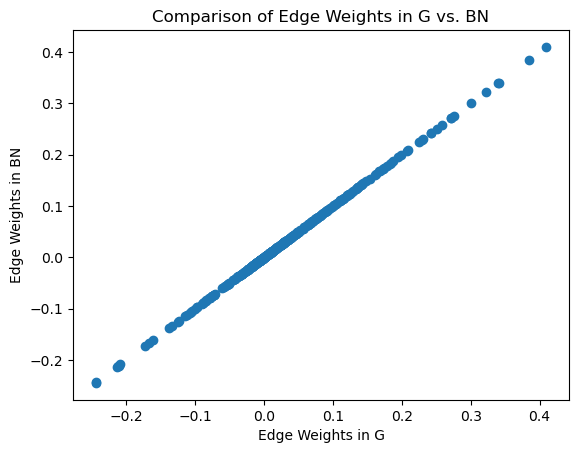

In [41]:
import matplotlib.pyplot as plt

# Extract edge weights from G
edges_G = G.edges(data=True)
weights_G = [data['weight'] for _, _, data in edges_G]

# Extract edge weights from BN
edges_BN = BN.edges(data=True)
weights_BN = [data['weight'] for _, _, data in edges_BN]

# Ensure both graphs have the same edges for comparison
common_edges = set(G.edges()).intersection(set(BN.edges()))
weights_G_common = [G[u][v]['weight'] for u, v in common_edges]
weights_BN_common = [BN[u][v]['weight'] for u, v in common_edges]

print(weights_G_common[:10])
print(weights_BN_common[:10])

# Plot the scatterplot
plt.scatter(weights_G_common, weights_BN_common)
plt.xlabel('Edge Weights in G')
plt.ylabel('Edge Weights in BN')
plt.title('Comparison of Edge Weights in G vs. BN')
plt.show()